In [205]:
# load and autoreload
from IPython import get_ipython

# noinspection PyBroadException
try:
    _magic = get_ipython().magic
    _magic("load_ext autoreload")
    _magic("autoreload 2")
except:
    pass


import datetime as dt
import glob
import os
import pprint
import sys

import matplotlib as mpl
import matplotlib.colors
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import xarray as xr

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [206]:
import bnn_tools.basic_funs as bfu
import bnn_tools.bnn_array
import bnn_tools.coag_sink as cs
import bnn_tools.funs as fu

In [207]:
#here im using temp and pres as a constant although it is much better to 
#use the timeseries
T = 273
P = 532_000

In [208]:
p = "/Users/aliaga/Documents/Work_DA/Work_inar/paper-2/small_data/v2_tratead_psd_data_smps_nais_chc_alto/v2_tratead_psd_data_smps_nais_chc_alto.nc"

In [209]:
ds = xr.open_dataarray(p)

In [210]:
ds["id"].to_series()

id
ion_neg                                        ion_neg
ion_pos                                        ion_pos
nais_ion_neg_neutral_smps    nais_ion_neg_neutral_smps
nais_ion_neutral_smps            nais_ion_neutral_smps
nais_neutral_smps                    nais_neutral_smps
neutral_neg                                neutral_neg
neutral_pos                                neutral_pos
smps                                              smps
Name: id, dtype: object

In [211]:
ds["loc"].to_series()

loc
alto    alto
chc      chc
Name: loc, dtype: object

In [212]:
ds

<xarray.DataArray 'dndlDp' (id: 8, loc: 2, time: 10656, lDp: 59)>
[10059264 values with dtype=float64]
Coordinates:
  * id       (id) object 'ion_neg' 'ion_pos' ... 'neutral_pos' 'smps'
  * lDp      (lDp) float64 -9.1 -9.05 -9.0 -8.95 -8.9 ... -6.35 -6.3 -6.25 -6.2
  * loc      (loc) object 'alto' 'chc'
  * time     (time) datetime64[ns] 2018-03-19 ... 2018-05-31T23:50:00
    dlDp     (lDp) float64 ...
    secs     (time) float64 ...
    Dp       (lDp) float64 ...

In [213]:
_id = "nais_ion_neutral_smps"

In [214]:
_lo = ["alto", "chc"]

In [215]:
_d = "2018-05-28"

In [216]:
d = ds.loc[{"id": _id, "loc": _lo, "time": _d}].reset_coords(drop=True)

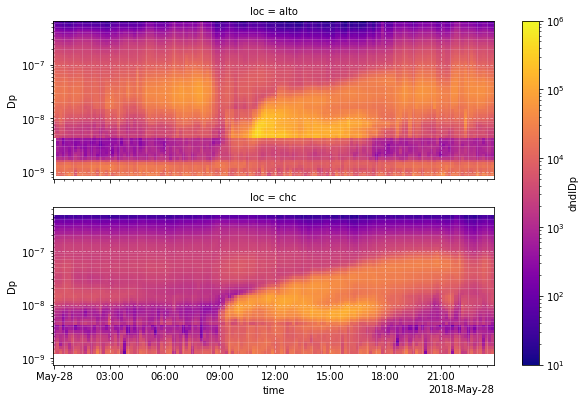

In [217]:
d.bnn.plot_psd(row="loc")

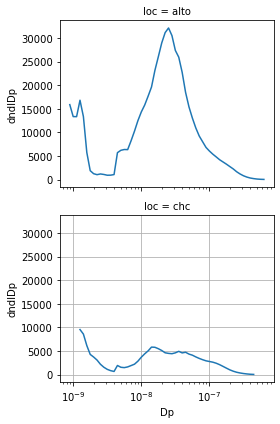

In [218]:
d.bnn.set_Dp().median("time").plot(xscale="log", row="loc")
ax = plt.gca()
ax.grid()

In [219]:
dNcm, d1, d2 = d.bnn.get_dN(0, 1)
dNm = dNcm * 1e6  # transform from cm2 to m3

In [221]:
bCS = cs.calc_bin_CS(dN_m3=dNm, T=T, P=P)

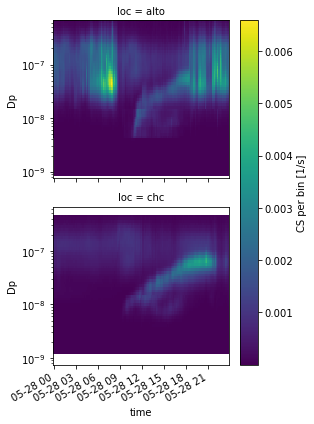

In [222]:
bCS.plot(
    x="time",
    yscale="log",
    robust=False,
    row="loc"
    #          norm=mpl.colors.LogNorm(vmin=1e-5),
)

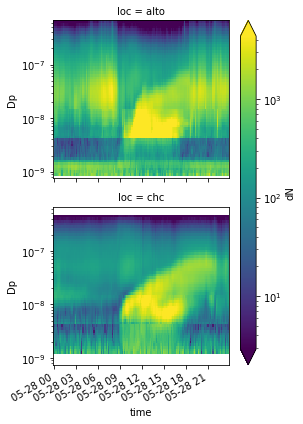

In [223]:
dNcm.plot(x="time", yscale="log", robust=True, norm=mpl.colors.LogNorm(), row="loc")

In [224]:
CS = cs.calc_CS(dN_m3=dNm, T=T, P=P)

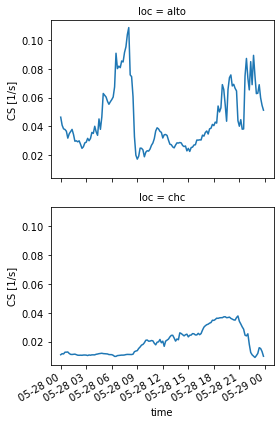

In [225]:
CS.plot(row="loc")

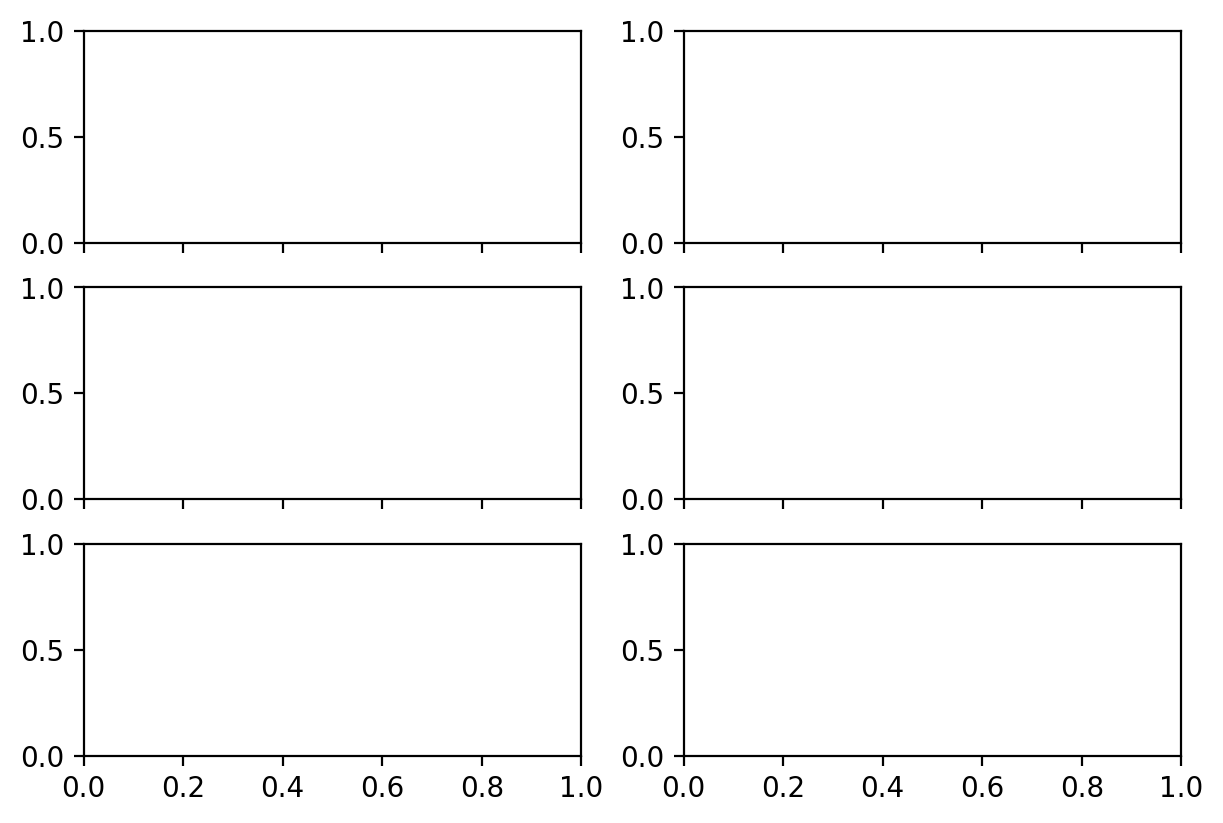

In [226]:
f, axs = plt.subplots(3, 2, constrained_layout=True, sharex=True, dpi=200)

In [227]:
axs[]

SyntaxError: invalid syntax (1849008055.py, line 1)

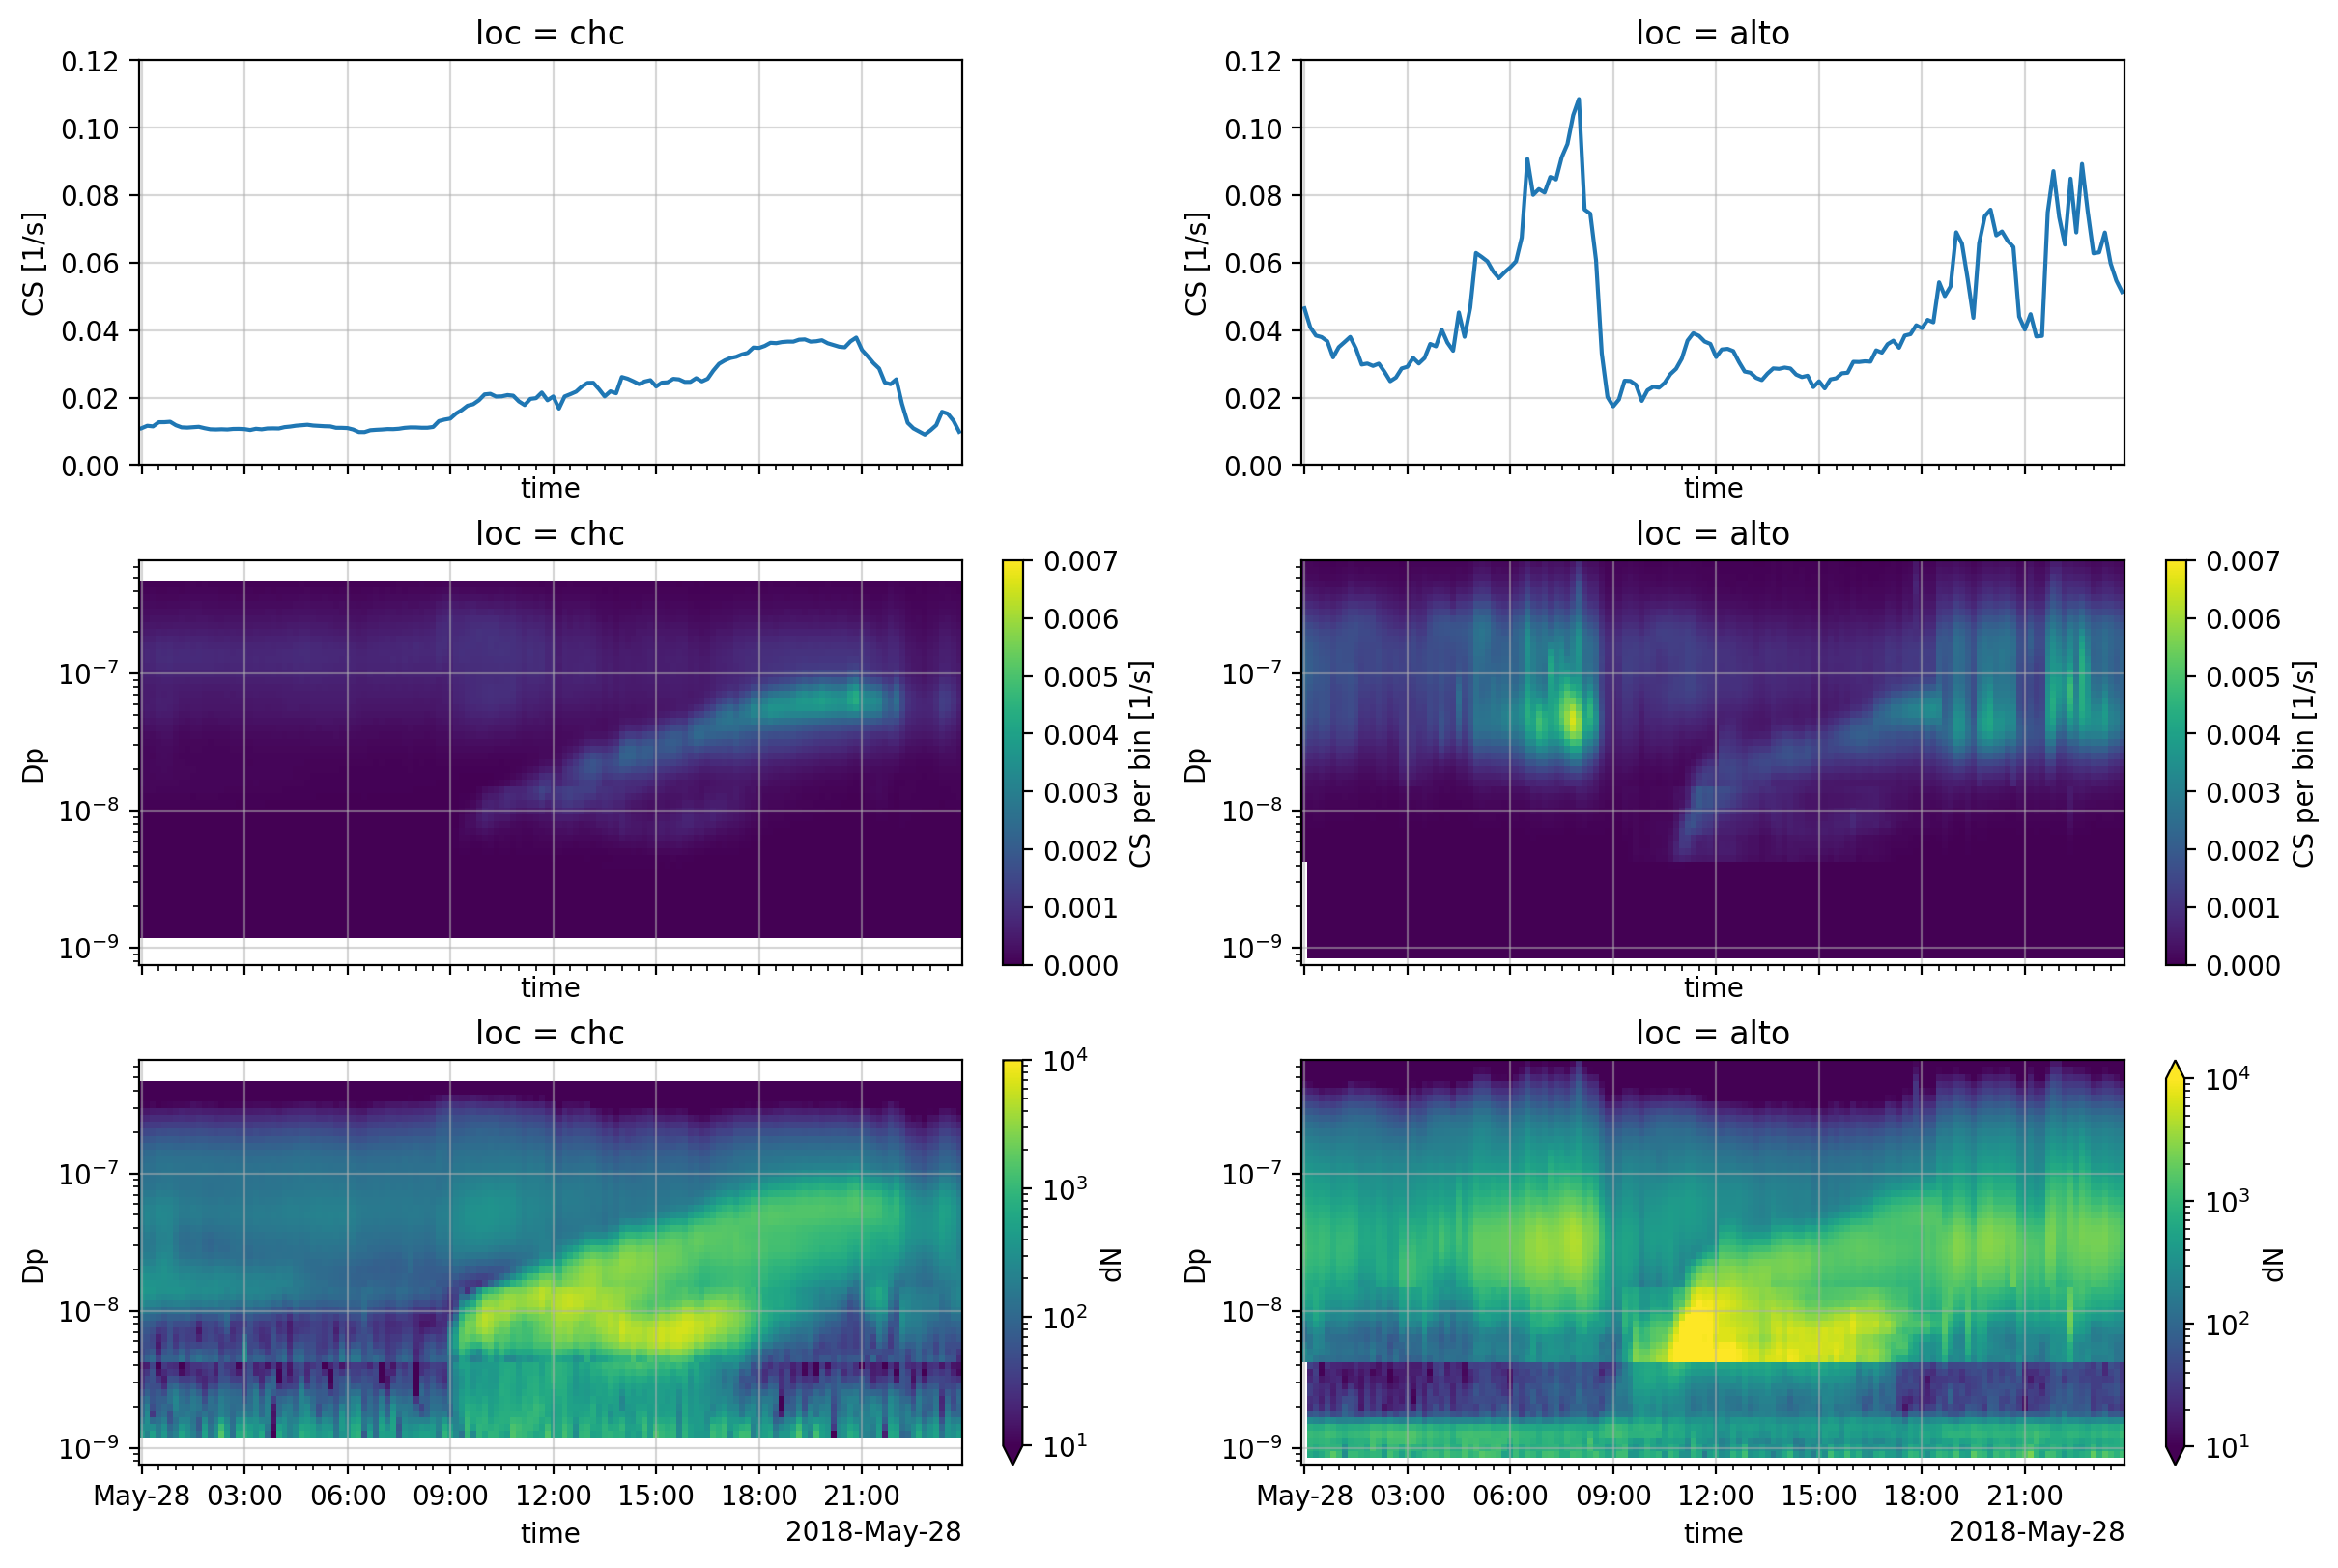

In [229]:
f, axss = plt.subplots(
    3, 2, constrained_layout=True, sharex=True, dpi=200, figsize=(12, 8)
)
cy = (0, 0.12)
cm, cM = 0, 0.007
nm, nM = 1e1,1e4
for i, loc in enumerate(["chc", "alto"]):
    axs = axss[:, i]

    dNcm.loc[{"loc": loc}].plot(
        x="time", yscale="log", robust=False, norm=mpl.colors.LogNorm(vmin=nm,vmax=nM), ax=axs[2]
    )
    CS.loc[{"loc": loc}].plot(ax=axs[0], ylim=cy)

    bCS.loc[{"loc": loc}].plot(
        x="time",
        yscale="log",
        robust=False,
        #          norm=mpl.colors.LogNorm(vmin=1e-5),
        ax=axs[1],
        vmin = cm,
        vmax = cM
    )

    for ax in axs:
        ax.grid(which="major", alpha=0.5)
        bfu.format_ticks(ax)

<xarray.DataArray (Dp: 59, time: 144)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
    lDp      (Dp) float64 -9.1 -9.05 -9.0 -8.95 -8.9 ... -6.35 -6.3 -6.25 -6.2
    dlDp     (Dp) float64 0.05 0.05 0.05 0.05 0.05 ... 0.05 0.05 0.05 0.05 0.05
  * Dp       (Dp) float64 7.943e-10 8.913e-10 1e-09 ... 5.623e-07 6.31e-07
  * time     (time) datetime64[ns] 2018-05-29 ... 2018-05-29T23:50:00
    dN       (time, Dp) float64 nan nan nan nan 116.2 ... 0.4177 nan nan nan